<a href="https://colab.research.google.com/github/ihedges9/Python-Projects/blob/main/475_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network: Handwritten Digit Recognition

This notebook uses the classic [MNIST handwritten digit](http://yann.lecun.com/exdb/mnist/) dataset, which contains digit 0-9 images of size 28*28. We build a CNN model to predict the class of digit.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist


## The MNIST dataset

### Get the data
MNIST dataset is provided by Keras directly. The following codes show how to load it.

In [2]:
# the data, shuffled and split between train and test sets
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Reshape and normalize the features

In [3]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train_pre.reshape(X_train_pre.shape[0], img_rows, img_cols, 1)
X_test = X_test_pre.reshape(X_test_pre.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

training data shape: (60000, 28, 28, 1)
60000 train samples, 10000 test samples


### convert class vectors to binary class matrices
convert class label to one-hot coding

In [4]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)

## The model

### Build the model

In [5]:
model1 = keras.Sequential()
model1.add(layers.Input(X_train.shape[1:]))
model1.add(layers.Conv2D(filters = 10, kernel_size=(5, 5), activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Conv2D(filters = 20, kernel_size=(5, 5), activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(100, activation='relu'))
model1.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.Adam(0.001)
model1.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [6]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 10)          │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 20)            │           5,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          32,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

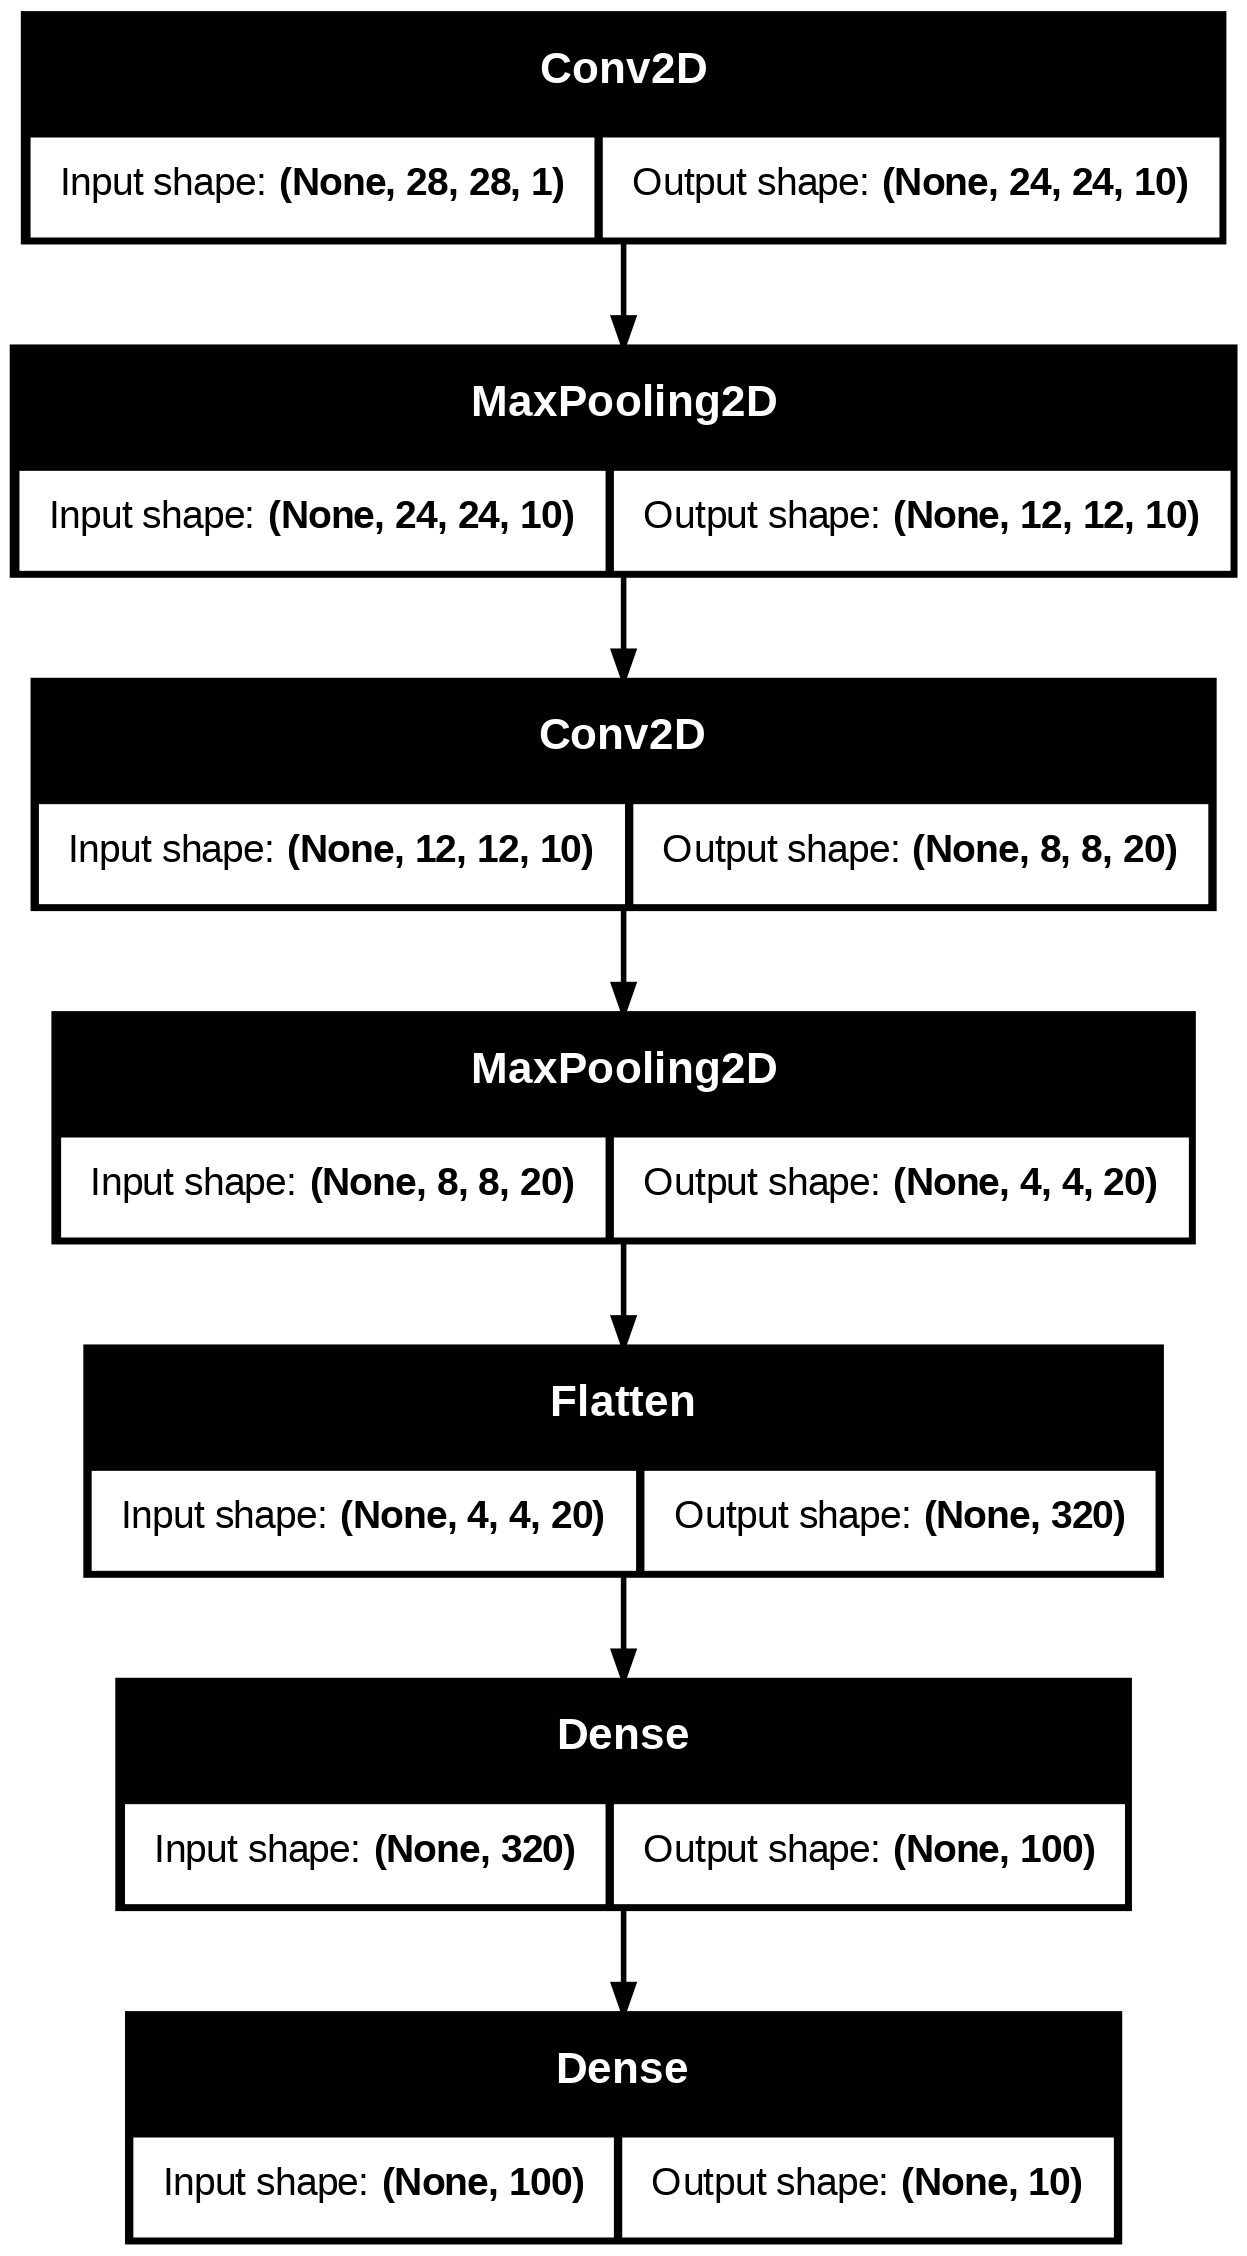

In [7]:
keras.utils.plot_model(model1, show_shapes=True)



### Train the model

In [8]:
EPOCHS = 50
BATCH = 128
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# use validation_split argument to do train-validation split
history = model1.fit(X_train, y_train,
                    batch_size=BATCH, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1,
                    callbacks=[early_stop])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.8037 - loss: 0.7294 - val_accuracy: 0.9684 - val_loss: 0.1056
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9702 - loss: 0.0957 - val_accuracy: 0.9765 - val_loss: 0.0781
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9797 - loss: 0.0652 - val_accuracy: 0.9787 - val_loss: 0.0701
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9831 - loss: 0.0533 - val_accuracy: 0.9833 - val_loss: 0.0553
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9859 - loss: 0.0453 - val_accuracy: 0.9840 - val_loss: 0.0520
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.9897 - loss: 0.0350 - val_accuracy: 0.9834 - val_loss: 0.0545
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 80ms/step - accuracy: 0.9908 - loss: 0.0302 - val_accuracy: 0.9868 - val_loss: 0.0454
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 69ms/step - accuracy: 0.9928 - loss: 0.0241 - 


### Visualize the Weights

In [9]:
model1.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [10]:
filters, biases = model1.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [11]:
n_filters, ix = 6, 1

In [12]:
filters.shape

(5, 5, 1, 10)

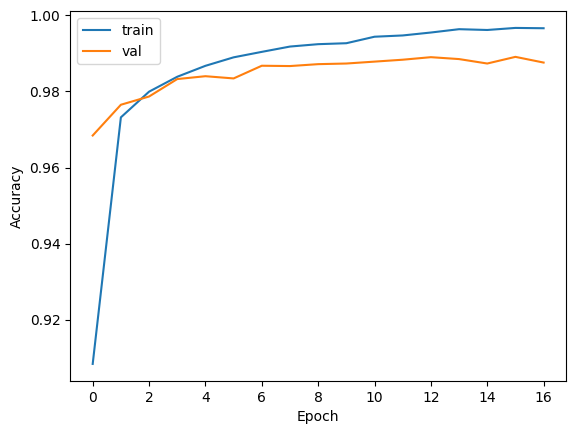

In [15]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### Make predictions

Calculate the classification accuracy for testing set

In [16]:
_, acc = model1.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.78%


Make predictions for testing data

In [17]:
y_pred = np.argmax(model1.predict(X_test), axis=-1)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([7, 2, 1, 0, 4])

## Convolution Model (with larger kernel and softplus activation)

In [18]:
model2 = keras.Sequential()
model2.add(layers.Input(X_train.shape[1:]))
model2.add(layers.Conv2D(filters = 10, kernel_size=(7, 7), activation='softplus'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(filters = 20, kernel_size=(7, 7), activation='softplus'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(100, activation='softplus'))
model2.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.Adam(0.001)
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [19]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 10)          │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 20)            │           5,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          32,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
EPOCHS = 50
BATCH = 128
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# use validation_split argument to do train-validation split
history = model2.fit(X_train, y_train,
                    batch_size=BATCH, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1,
                    callbacks=[early_stop])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7617 - loss: 0.8185 - val_accuracy: 0.9536 - val_loss: 0.1672
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9570 - loss: 0.1534 - val_accuracy: 0.9643 - val_loss: 0.1140
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9725 - loss: 0.0927 - val_accuracy: 0.9732 - val_loss: 0.0857
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9776 - loss: 0.0726 - val_accuracy: 0.9764 - val_loss: 0.0765
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9827 - loss: 0.0536 - val_accuracy: 0.9778 - val_loss: 0.0726
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9857 - loss: 0.0466 - val_accuracy: 0.9761 - val_loss: 0.0751
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9875 - loss: 0.0418 - val_accuracy: 0.9844 - val_loss: 0.0595
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9903 - loss: 0.0317 - val

In [21]:
_, acc = model2.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.61%


25 epochs, 64 batch size, patience of 3, mixed activation, RMSprop, validation 0.3, 3x3 kernel, 0.005 learning


In [38]:
model3 = keras.Sequential()
model3.add(layers.Input(X_train.shape[1:]))
model3.add(layers.Conv2D(filters = 10, kernel_size=(3, 3), # padding = "same",
                 activation='sigmoid'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Conv2D(20, (3, 3), activation='elu'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Conv2D(20, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(100, activation='selu'))
model3.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.RMSprop(0.005)
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [39]:
model3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 26, 26, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 11, 11, 20)          │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 3, 3, 20)            │           3,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 1, 1, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │           2,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,650 (33.79 KB)

 Trainable params: 8,650 (33.79 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
EPOCHS3 = 25
BATCH3 = 64
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# use validation_split argument to do train-validation split
history = model3.fit(X_train, y_train,
                    batch_size=BATCH3, epochs=EPOCHS3,
                    validation_split = 0.2, verbose=1,
                    callbacks=[early_stop])

Epoch 1/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.7021 - loss: 0.8726 - val_accuracy: 0.9171 - val_loss: 0.2611
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 32ms/step - accuracy: 0.9431 - loss: 0.1855 - val_accuracy: 0.9594 - val_loss: 0.1379
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.9580 - loss: 0.1382 - val_accuracy: 0.9653 - val_loss: 0.1212
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9653 - loss: 0.1157 - val_accuracy: 0.9678 - val_loss: 0.1051
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9695 - loss: 0.1007 - val_accuracy: 0.9710 - val_loss: 0.0988
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9708 - loss: 0.0930 - val_accuracy: 0.9697 - val_loss: 0.1027
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 37ms/step - accuracy: 0.9750 - loss: 0.0811 - val_accuracy: 0.9733 - val_loss: 0.0890
Epoch 8/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - accuracy: 0.9769 - loss: 0.0770 - 

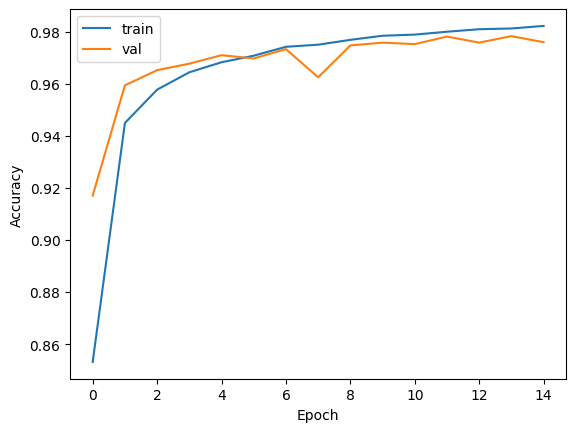

In [41]:
plot_history(history)

In [42]:
_, acc = model3.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 97.43%
